<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_9_mscluster_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Shift Clustering
## ELE606 - Tópicos Especiais em Inteligência Artificial

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://th.bing.com/th/id/OIP.mKK2hp37UrbEcXsVl0-19AHaEu?rs=1&pid=ImgDetMain"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)



## Introdução

O Mean Shift Clustering visa descobrir "bolhas" em uma densidade suave de amostras. É um algoritmo baseado em centroides, que funciona atualizando candidatos a centroides para serem a média dos pontos dentro de uma determinada região. Esses candidatos são então filtrados em um estágio de pós-processamento para eliminar quase duplicatas para formar o conjunto final de centroides.

---

## Algoritmo e código

### Pré-processamento dos dados

Primeiramente, vamos importar os módulos utilizados.

In [ ]:
from sklearn.datasets import load_wine    # Base de Dados
from sklearn.cluster import MeanShift, estimate_bandwidth   # Modelo de Clustering
import numpy as np    # Construcoes Matematicas
import matplotlib.pyplot as plt   # Visualizacao
from sklearn.preprocessing import StandardScaler    # Normalization

Vamos carregar a base de dados. Como vamos fazer um _clustering_, não nos preocupamos com as _labels_.

In [ ]:
# Load the Wine dataset
data = load_wine()
X = data.data[:, [6, 9]]  # 2 Features

Estimar largura de banda (a estimativa de largura de banda é importante para o Mean Shift)

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

print(bandwidth)

1.5533932175343832


Vamos dar um _fit_, ou seja, "ajustar" o modelo.

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Vamos identificar as labels únicas e o número de clusters.

In [ ]:
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)
print(f"Number of estimated clusters: {n_clusters}")

Number of estimated clusters: 4


Por fim, vamos plotar os _clusterings_.

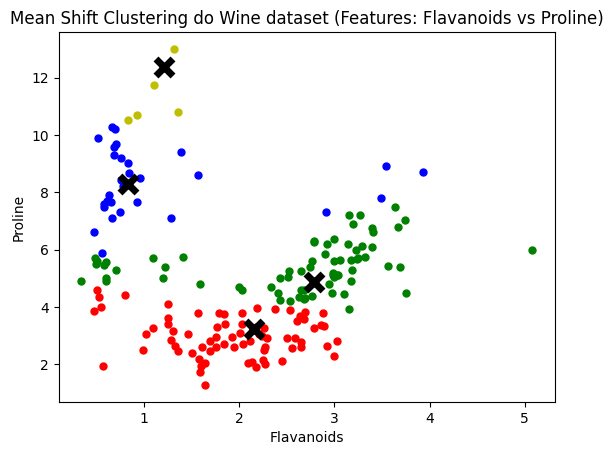

In [ ]:
# Plotting the clusters
colors = ['r.', 'g.', 'b.', 'y.', 'c.', 'm.', 'k.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

# Plotting cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=150, linewidths=5, zorder=10, color='black')
plt.title('Mean Shift Clustering do Wine dataset (Features: Flavanoids vs Proline)')
plt.xlabel('Flavanoids')
plt.ylabel('Proline')
plt.show()